# 파이썬 음악
저자 온석대학원대학교 인공지능음악 전공 지도교수 최영준

주제: 파이썬으로 음악을 만드는 기초 과정
온석대학원 대학교 인공지능음악과정 의 인공지능 음악 실습 수업 자료 입니다.
(c)2020 저작권은 온석대학원 대학교 인공지능 음악과정 지도 교수 최영준에게 있습니다. 
수업시간이나 개인적인 목적으로 사용하실때 출처를 밝히고 사용하는것은 상관없지만.
무단 도용은 금지 합니다.

# 8삼성전자주가 인공지능 음악 작곡 

다음은 2020년에 작곡한 삼성전자 주가 음악 입니다.

앞서 자연에서 수학을 발견한다고 하여 사인함수와 코사인 함수의 에튀드를 작곡하여 보았습니다

https://finance.yahoo.com/quote/005930.KS/history?p=005930.KS
    
위의 링크를 타고 가면 삼성전자의 최신 주가가 나와 있으며 다운로드 할수 있습니다
다운로드 되는 파일은 몇 가지 필드를 쉼표(,)로 구분한 텍스트 데이터 및 텍스트 파일로
CSV(영어: comma-separated values)형식으로 부릅니다

CSV파일을 주피터 노트북에서 열어 보려면 몇가지 라이브러리가 필요한데 
pandas,numpy
그리고 도표를 그리는 matplotlib 라이브러리등이 필요합니다

다운로드된 삼성전자 csv파일로 부터 종가를 찾아내고 이를 바탕 으로 음악을 작곡 해봅니다

In [6]:
from music21 import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

stream = stream.Stream();
%matplotlib inline
matplotlib.rcParams['figure.figsize']=[12.0,8.0]

df1 = pd.read_csv('005930.KS.csv')
df1.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-17,74000.0,75100.0,74000.0,74200.0,72694.390625,30944847
1,2021-08-18,73900.0,74600.0,73100.0,73900.0,72400.476563,29192631
2,2021-08-19,73500.0,74400.0,73100.0,73100.0,71616.703125,22166298
3,2021-08-20,73500.0,73900.0,72500.0,72700.0,71224.820313,22364803
4,2021-08-23,73300.0,74000.0,73000.0,73300.0,71812.640625,19384648
5,2021-08-24,73900.0,75700.0,73900.0,75600.0,74065.976563,21016913
6,2021-08-25,76200.0,76600.0,74900.0,75700.0,74163.945313,22319664
7,2021-08-26,76100.0,76200.0,74600.0,74600.0,73086.265625,16671494
8,2021-08-27,74300.0,75000.0,73800.0,74300.0,72792.359375,15172748
9,2021-08-30,75400.0,75500.0,74200.0,74600.0,73086.265625,12686999


위의 세세한 코드의 작동을 딱히 알 필요는 없다. 
우리가 필요한 것은 종가 이기 때문에 삼성전자 주가의 종가 만 알아내면 됩니다.

세상은 넓고 알아야 할것은 너무 많으므로, 필요한 것들만 빨리 배우는 연습을 하는것이 좋습니다.
물론 처음부터 바닥부터, 기초 부터 를 강조하는 선생님들이 많은데
그들은 십중 팔구 그저 여러분의 학원비, 레슨비를 지속적으로 받으려는 사람들일 확률이 높습니다.

위의 코드중 여러분이 관심가져야 하는 곳은 
df1 = pd.read_csv('005930.KS.csv')
입니다.

이곳에서 다른 주가 파일로 시도해 볼 수도 있습니다. 
셀트리온 주가로 곡을 써보라고 오리엔탈익스프레스의 가야금 연주자 박경소씨가 추천을 하였는데.
그 주식을 잠시 들여다 보니 매우 재미 있었습니다.

df1.head(10)

코드 는 길고긴 삼성전자 주가중 앞의 10개만 보겠다는 것입니다

In [ ]:
엑셀을 조금만 사용할줄 안다면 csv 파일은 엑셀파일과 비슷하다는것을 알수 있을것입니다.

가로줄을 행(行, row), 세로줄을 열(列, column)이라고 부릅니다.

csv 파일도 행과 열이 있으며 제 1행은 
앞으로 나타날 데이터 들이 무엇인지를 정하고 있습니다.

이중에서 Close 열을 살펴보겠습니다

Close 열은
pd.read_csv('005930.KS.csv') 을 통해 읽어들인 파일 df1 중 df1의 Close값을 살펴보면 됩니다.

In [8]:
df1['Close']

0      74200.0
1      73900.0
2      73100.0
3      72700.0
4      73300.0
        ...   
238    60800.0
239    60000.0
240    59100.0
241    59900.0
242    60200.0
Name: Close, Length: 243, dtype: float64

In [ ]:
삼성전자 주식의 종가는 총 243 의 길이를 가지고 있으며 데이터 타입은 float64 입니다

파이썬은 여러가지 데이터 타입을 가지고 있는데 
On/Off , Yes/No, 1,0 을 표현할 수 있는 Boolean
정수형인 Integer
부동소수형인 float 
등을 가지고 있습니다.

그런데 
numpy 라이브러리는 위의 데이터 형을 조금더 세분화 하여 사용하고 있습니다.
Int8 은 1비트당 2개의 숫자를 표현할 수 있으므로 8비트면 2^8 = 256개의 정수를 표현할 수 있습니다. 즉 -128에서 127까지 표현가능
int16 은 2^16개의 정수표현 가능. -32,768에서 32,767까지.
int32 은 2^32개의 정수표현 가능. -2,147,483,648에서 2,147,483,647까지. 
int64 은 2^64개의 정수표현 가능. -9,223,372,036,854,775,808에서 9,223,372,036,854,775,807까지

이며
float16 은 1비트는 부호에, 5비트는 정수부분을 나타내는데, 10비트는 소수부분을 나타내는데 사용
float32 은 1비트 부호, 8비트 정수, 23비트 소수.
float64 은 1비트 부호, 11비트 정수, 52비트 소수. 

입니다. 

다 외울 필요는 없으며 
float32 면 웬만한 숫자는 다 표현 할 수 있구나 정도로 이해하고 넘어가도 됩니다.


In [ ]:
이제 matplotlib 라이브러리의 plot 명령을 사용하여 삼성전자 주가의 종가만 따로 빼내어 그래프를 그릴 수 있겠습니다


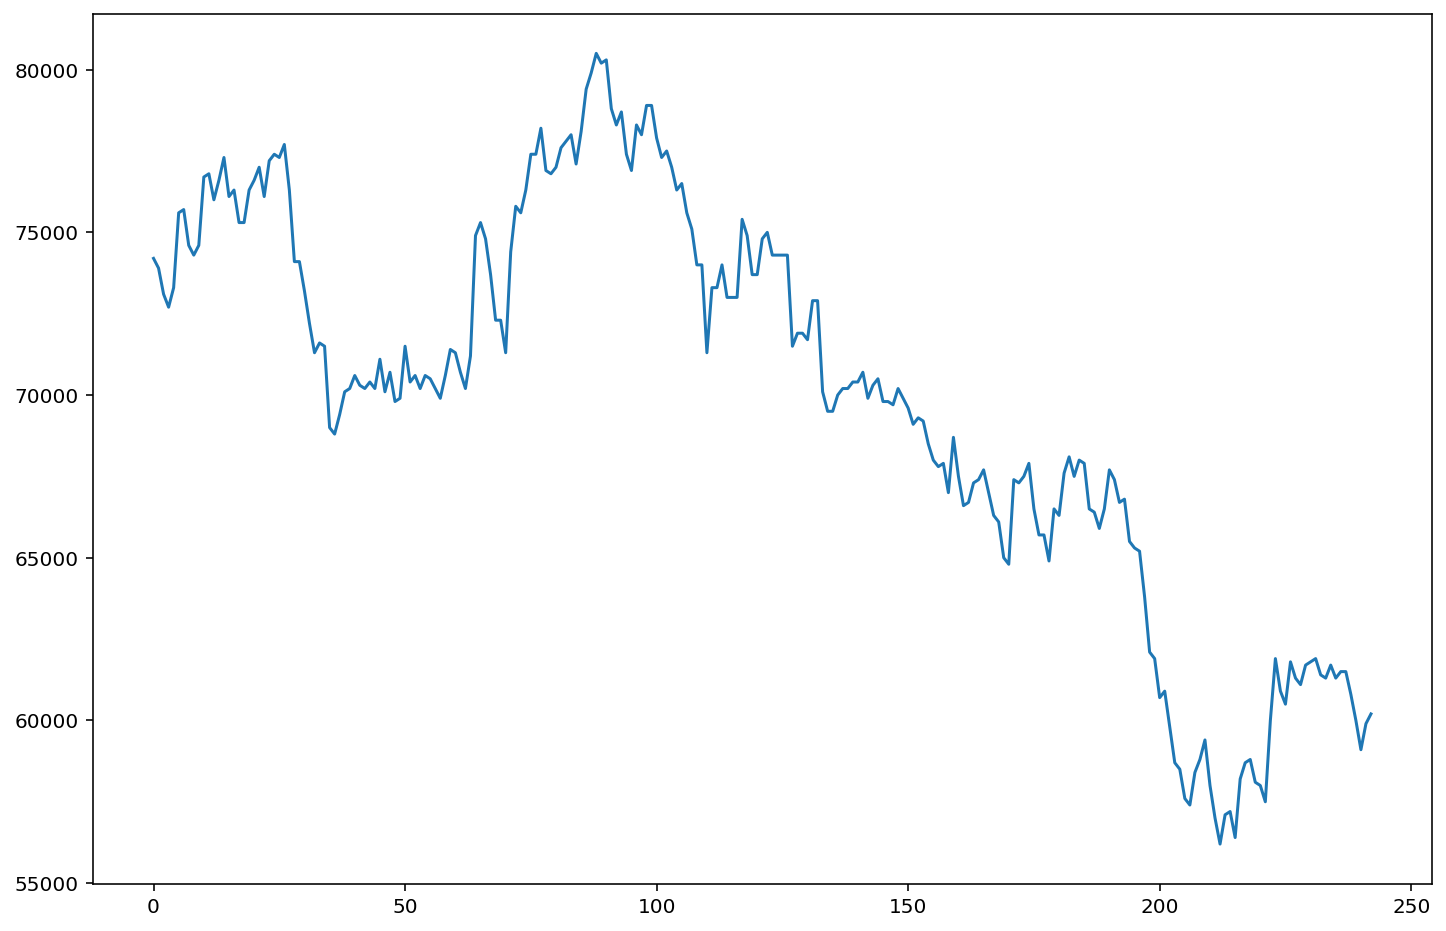

In [9]:
plt.plot(df1['Close'])

그래프를 보니 주가가 계속 떨어지고 있습니다.

이것을 운동량 (運動量, 영어: momentum)라고 하는데
"물리학 특히, 뉴턴 역학에서 물체의 질량과 속도의 곱으로 나타내는 물리량이다.
운동량의 국제 단위는 뉴턴 초 (N · s) 또는 킬로그램 미터 매 초 (kg · m/s)이고, 통상적인 기호는 라틴 소문자 p이다. 
선형 운동량(linear momentum) 혹은 병진 운동량(translational momentum)이라고도 부른다."
는 백과사전의 설명입니다.

어려우니.

다음과 같이 이해해보도록 하겠습니다.

삼성전자 주가의 향방을 보니 계속 떨어지고 있고. 
계속 떨어지는 운동에너지가 크다보니 앞으로도 떨어지겠다.
다만 뒷부분에서 약간 반등의 신호가 있으니 오를 가능성도 있어 보입니다.

인공지능이 주가를 예측하는 시스템도 사람이 주가 그래프를 보는것과 비슷합니다
단순히 종가 만 보고 다음날의 주가를 예측한다면 정보가 너무 없기에 위와 같이 주가의 향방을 이야기 할 수 있을것입니다

또. 50씩 끊어서 데이터를 볼것인지.
100씩 끊어서 데이터를 볼것인지
아니면 마지막 50 만 볼것인지
에 따라 또 다르겠습니다.

마지막 50만 본다면 주식은 반등의 기미를 보이고 있으니 투자를 해야 할것입니다.

그런데 

또 이야기 하지만 세상은 넓고 복잡합니다.

삼성전자의 주가를 설명하기에는 중국과 미국의 반도체 전쟁에 대해서 알아야 하고
삼성전자 회장의 가석방, 국민들이 삼성전자를 생각하는 바, 20대가 삼성전자를 생각하는 측면, 50대가 삼성전자를 생각하는 측면.
모든것이 다 다릅니다.

그러므로, 데이터가 많으면 많을 수록. 고려할 사항이 많으면 많을 수록 인공지능은 똑똑해지고 주가의 예측도 정확히 할 수 있게 될것입니다.

인공지능으로 음악을 만든다는 것을 책으로 설명한다는것은
단순히 4분음표, 혹은 쉼표를 나열하는 수준에서 멈출수 밖에 없을 것입니다
그런데 실제 음악은 어떤가요?

꾸밈음, 장식음, 뉘앙스, 다이내믹 등등, 고려해야할 사항이 너무 많습니다.
이 모든것을 학습 시킨다면 아마 작곡자가 필요없는 세상이 될것입니다.
창의적인 일은 인공지능이 대체 할 수 없다라고 생각하였으나.작곡자의 역할이 위협받고있으며
앞으로 음악을 하는 음대생은 인공지능과 같은 일자리를 놓고 경쟁을 해야 할지도 모르는 세대가 될것입니다.
MZ세대 이후의 알파 세대를 그 첫 타자로 보고 있다고 다들 예측하니.
중간층이 모두 없어지고 최상위 그룹과 최 하위 그룹만 남는 모래시계형의 사회 구조에서 어떻게 살아 남을지는 여러분의 선택일 것이며
그 시간은 점점 짧아지고 있습니다.



In [ ]:
다시 프로그램으로 돌아와 그래프를 잘 살펴보겠습니다
삼성전자 주가의 종가는 대략 5만5천 부터 8만 사이를 오가고 있습니다
그러므로 삼성전자의 종가를 1000으로 나눈다면
55(G3)부터 80(Ab6) 까지의 수가 됩니다
딱 좋습니다
미디는 0~127 의 8비트 데이터라 0~127 까지 표현이 가능하지만 
듣기 적당한 부분은 딱 이 부분입니다.

나의 새로운 음들을 삼성전자 종가 samsungStockClosePrice 를 1000으로 나눈 숫자로 정해보겠습니다.

In [13]:
samsungStockClosePrice=df1['Close']/1000

In [14]:
samsungStockClosePrice

0      74.2
1      73.9
2      73.1
3      72.7
4      73.3
       ... 
238    60.8
239    60.0
240    59.1
241    59.9
242    60.2
Name: Close, Length: 243, dtype: float64

In [ ]:
이제 작곡을 할 시간 입니다.

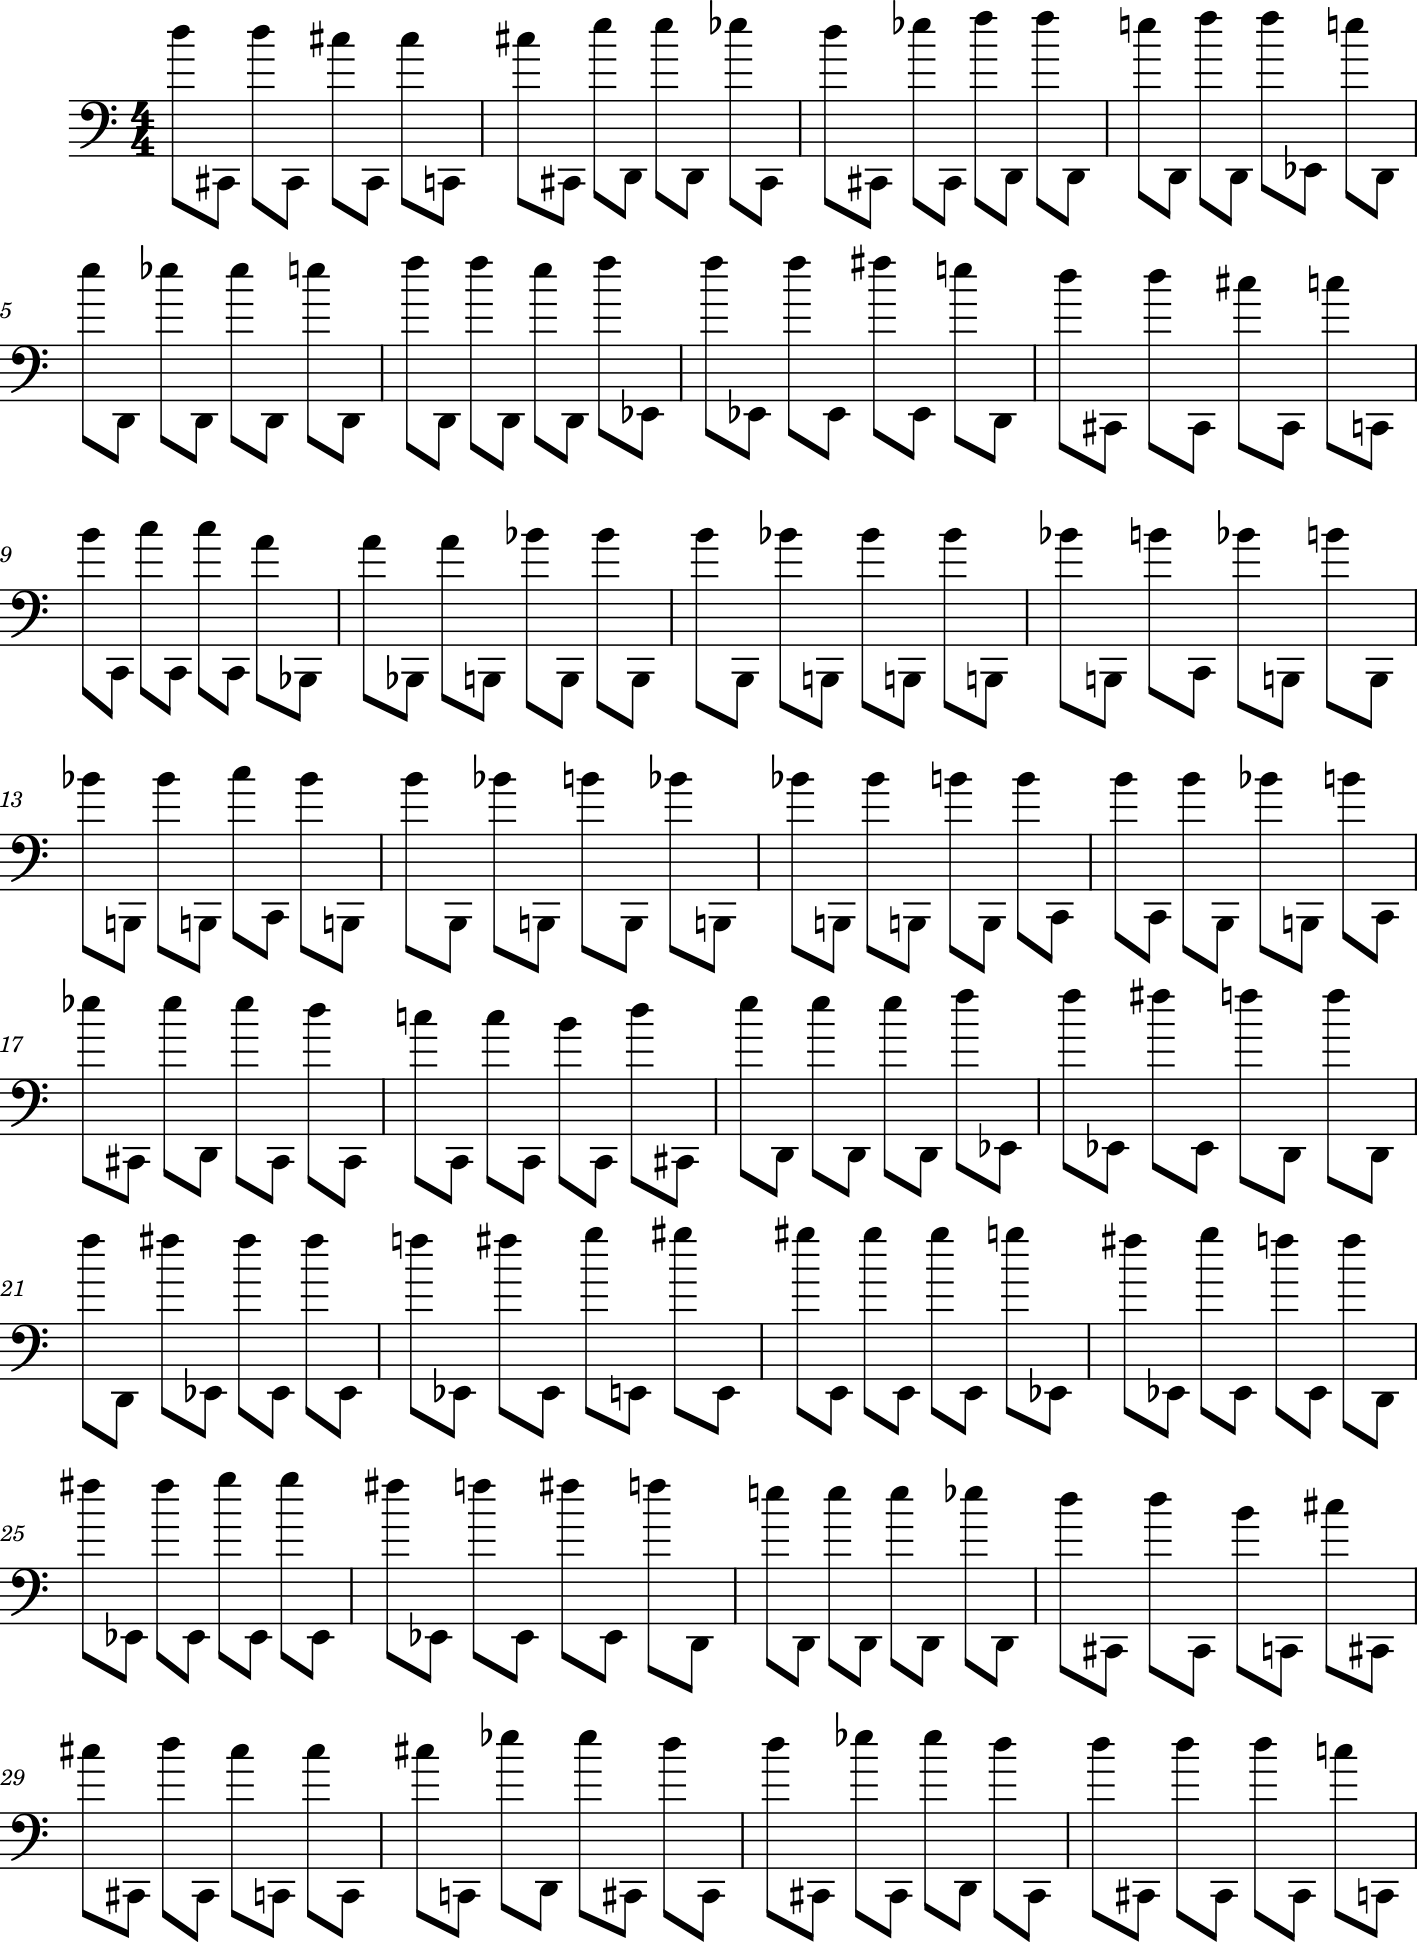

In [15]:
for pitch in samsungStockClosePrice:
    stream.append(note.Note(midi=pitch, type='eighth'))
    stream.append(note.Note(midi=pitch/2, type='eighth'))
stream.show()

In [16]:
stream.show("midi")

In [ ]:
주가 하나만 가지고 단선율을 만들어보니 지루하고 긴장감이 없어서
stream.append(note.Note(midi=pitch/2, type='eighth')) 
를 사용하여 왼손 반주를 만들었습니다.

에튀드의 묘미는 연주하기 힘든 양손 이중주 아니겠습니까?